In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

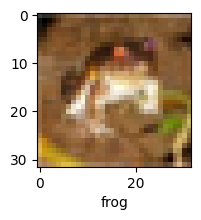

In [12]:
plot_sample(X_train, y_train, 0)

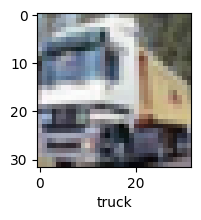

In [13]:
plot_sample(X_train, y_train, 1)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model architecture
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
cnn.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training with specified batch size and number of epochs
history = cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[es])

# Evaluate the model on test set
cnn.evaluate(X_test, y_test)

Epoch 1/50
1250/1250 [==============================] - 30s 23ms/step - loss: 1.5056 - accuracy: 0.4591 - val_loss: 1.2256 - val_accuracy: 0.5667
Epoch 2/50
1250/1250 [==============================] - 28s 22ms/step - loss: 1.1459 - accuracy: 0.5978 - val_loss: 1.0543 - val_accuracy: 0.6322
Epoch 3/50
1250/1250 [==============================] - 28s 22ms/step - loss: 1.0085 - accuracy: 0.6476 - val_loss: 1.0467 - val_accuracy: 0.6345
Epoch 4/50
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9139 - accuracy: 0.6806 - val_loss: 0.9689 - val_accuracy: 0.6620
Epoch 5/50
1250/1250 [==============================] - 27s 21ms/step - loss: 0.8403 - accuracy: 0.7085 - val_loss: 0.9659 - val_accuracy: 0.6598
Epoch 6/50
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7856 - accuracy: 0.7269 - val_loss: 0.9209 - val_accuracy: 0.6846
Epoch 7/50
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7246 - accuracy: 0.7466 - val_loss: 0.9571 -

[1.0893319845199585, 0.6791999936103821]

In [16]:
# Save the trained CNN model
cnn.save('cnn_model.h5')

c:\Users\Vijay Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[3.84173385e-04, 4.12136615e-06, 1.07677896e-02, 8.36137474e-01,
        4.36920527e-04, 1.47036538e-01, 4.53303242e-03, 1.22877274e-04,
        5.68780059e-04, 8.25468578e-06],
       [4.78796528e-06, 6.71039056e-03, 7.65633446e-10, 7.84132759e-09,
        7.74426218e-11, 9.83092940e-10, 7.74990697e-11, 1.42024652e-12,
        9.93273377e-01, 1.13903725e-05],
       [1.10806614e-01, 2.89457161e-02, 1.98350358e-03, 1.26326662e-02,
        8.76123493e-04, 3.65966815e-03, 1.23970734e-04, 1.14635375e-04,
        8.27732921e-01, 1.31241800e-02],
       [9.71144259e-01, 7.93348518e-05, 1.22701330e-03, 1.08113542e-04,
        1.04740937e-03, 9.41821509e-06, 5.80450796e-06, 9.91308298e-07,
        2.63416637e-02, 3.60380000e-05],
       [4.97170127e-09, 2.90893286e-06, 8.15854128e-03, 1.61528569e-02,
        9.45246577e-01, 5.35812069e-05, 3.03851925e-02, 3.09592849e-08,
        2.98590834e-07, 1.14088516e-08]], dtype=float32)

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1000
           1       0.85      0.74      0.79      1000
           2       0.61      0.54      0.57      1000
           3       0.55      0.41      0.47      1000
           4       0.57      0.67      0.61      1000
           5       0.54      0.66      0.59      1000
           6       0.81      0.70      0.75      1000
           7       0.66      0.79      0.72      1000
           8       0.75      0.84      0.79      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

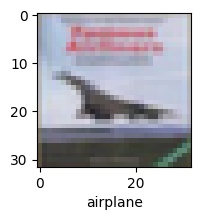

In [21]:
plot_sample(X_test, y_test,3)

In [22]:
classes[y_classes[3]]

'airplane'

In [23]:
classes[y_classes[3]]

'airplane'

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

# Define the model architecture with regularization
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # L2 regularization added
    layers.Dense(10, activation='softmax')
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

cnn.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Model training with data augmentation
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=64),
                  epochs=40,
                  validation_data=(X_val, y_val),
                  verbose=1,
                  callbacks=[es])

# Evaluate the model on test set
cnn.evaluate(X_test, y_test)

# Save the trained CNN model
cnn.save('cnn_model_optimized.h5')

Epoch 1/40
320/320 [==============================] - 16s 48ms/step - loss: 1.9122 - accuracy: 0.3161 - val_loss: 1.6131 - val_accuracy: 0.4262
Epoch 2/40
320/320 [==============================] - 16s 50ms/step - loss: 1.6023 - accuracy: 0.4369 - val_loss: 1.5044 - val_accuracy: 0.4793
Epoch 3/40
320/320 [==============================] - 16s 51ms/step - loss: 1.5014 - accuracy: 0.4744 - val_loss: 1.4423 - val_accuracy: 0.5029
Epoch 4/40
320/320 [==============================] - 14s 45ms/step - loss: 1.4396 - accuracy: 0.5041 - val_loss: 1.4797 - val_accuracy: 0.5029
Epoch 5/40
320/320 [==============================] - 15s 45ms/step - loss: 1.3968 - accuracy: 0.5212 - val_loss: 1.2916 - val_accuracy: 0.5689
Epoch 6/40
320/320 [==============================] - 15s 46ms/step - loss: 1.3650 - accuracy: 0.5370 - val_loss: 1.3011 - val_accuracy: 0.5594
Epoch 7/40
320/320 [==============================] - 15s 46ms/step - loss: 1.3350 - accuracy: 0.5500 - val_loss: 1.3743 - val_accuracy:

c:\Users\Vijay Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# Generate predictions
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 2s 7ms/step


In [33]:
# Generate predictions
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Print classification report
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.71      1000
           1       0.76      0.84      0.80      1000
           2       0.62      0.51      0.56      1000
           3       0.55      0.44      0.49      1000
           4       0.64      0.58      0.61      1000
           5       0.70      0.46      0.56      1000
           6       0.70      0.83      0.76      1000
           7       0.62      0.81      0.70      1000
           8       0.81      0.74      0.78      1000
           9       0.71      0.77      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



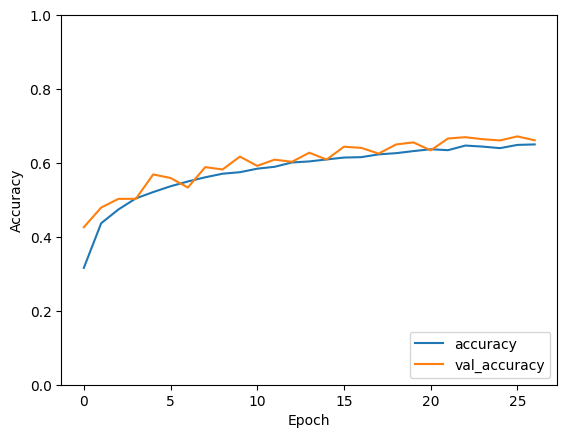

In [34]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

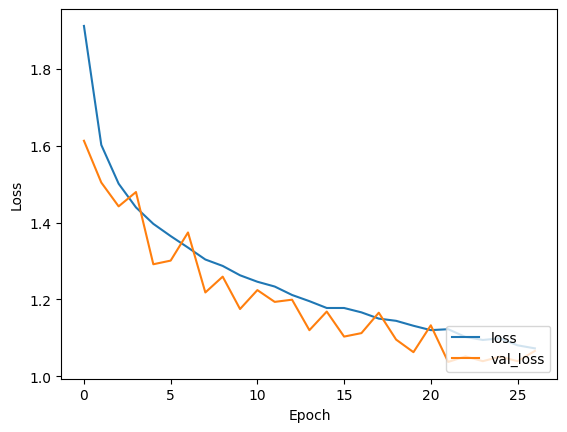

In [35]:
# Plot training and validation accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()